## Random forest in normalized feature data

In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('/home/kishore/Datasets/PAMAP2_Dataset/cleaned/new/allfnormalized.csv')

idd=df['activityID'].unique().tolist()

name=['lying','sitting','standing','ironing','vacuum cleaning','ascending stairs',
       'descending stairs','walking','running','cycling', 'nordic walk']

for i in range(11):
    df['activityID'].replace(idd[i],name[i],inplace=True)
    
a= df['activityID'].tolist()   
df=df.drop(columns=['activityID'])
b=pd.DataFrame({'Activity': a})
df=pd.concat([df,b],axis=1)


In [5]:
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statistics import mean 
from sklearn import preprocessing
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score,accuracy_score, confusion_matrix, f1_score

encoder = preprocessing.LabelEncoder()

both_df = df

#print('Shape both:\t{}\n'.format(both_df.shape))

def get_train_test_data(a):
    tr_df=both_df[(both_df.subject != a)]
    
    te_df=both_df.loc[both_df['subject'].isin([a])]
                                           
    return tr_df,te_df
                     

def get_label(t):
    return t.Activity.values    
    
def drop_label(t):
    return t.drop('Activity' , axis=1).values

def encode_label(e):
    encoder.fit(e)
    return encoder.transform(e)                                          

                                        
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting `normalize=True`.
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.rcParams['figure.figsize'] = [19, 9]
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



def get_acc_recall_prec_f1_score_and_confusion_mat(a):
    
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear',
                                         probability=True,
                                         random_state=0))
    train,test=get_train_test_data(a)
    
    train_label=get_label(train)
    test_label=get_label(test)
    
    train_data_without_label=drop_label(train)
    test_data_without_label=drop_label(test)
    
    encoded_label_of_train_data=encode_label(train_label)
    classifier.fit(train_data_without_label, encoded_label_of_train_data)
    
    
    encoded_label_of_test_data=encode_label(test_label)
    y_te_pred = classifier.predict(test_data_without_label)
    
    acc1 = accuracy_score(encoded_label_of_test_data, y_te_pred)
    prec1 = precision_score(encoded_label_of_test_data, y_te_pred, average="macro")
    rec1 = recall_score(encoded_label_of_test_data, y_te_pred, average="macro")
    F1_score1= f1_score(encoded_label_of_test_data, y_te_pred, average="macro")
    
    print("Accuracy: %3.5f, Precision: %3.5f, Recall: %3.5f, f1_score: %3.5f" % (acc1, prec1, rec1,F1_score1))
    
    cfs = confusion_matrix(encoded_label_of_test_data, y_te_pred)
    plt.figure()
    class_names = encoder.classes_
    plot_confusion_matrix (cfs, classes=class_names,
                          title='SVM Confusion Matrix, without normalization')
    plt.show()
    return acc1,prec1,rec1,F1_score1
    


persons that are kept for testing:	1

Accuracy: 0.89656, Precision: 0.88899, Recall: 0.89699, f1_score: 0.88756
Confusion matrix, without normalization


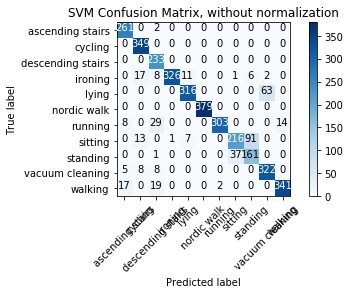



persons that are kept for testing:	2



/home/kishore/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kishore/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.88287, Precision: 0.82140, Recall: 0.82608, f1_score: 0.81116
Confusion matrix, without normalization


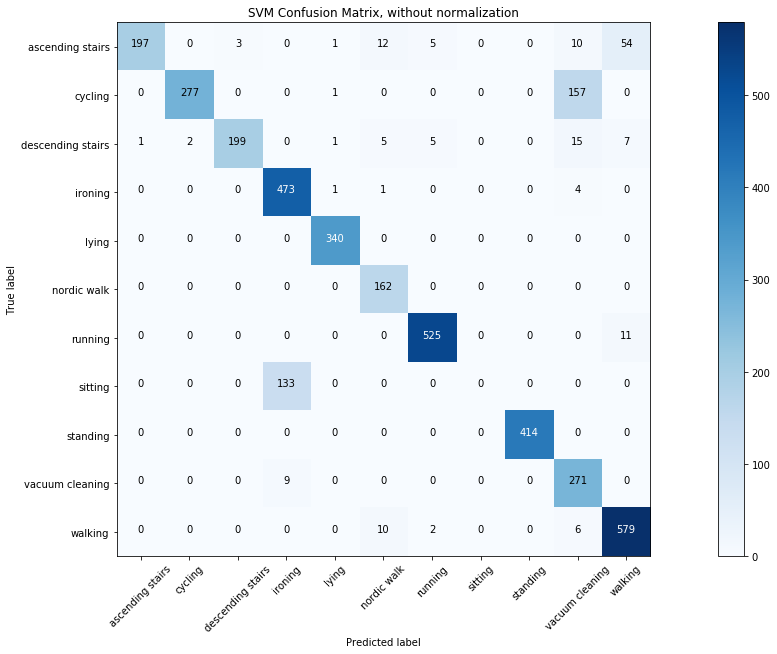



persons that are kept for testing:	5

Accuracy: 0.90670, Precision: 0.91282, Recall: 0.90839, f1_score: 0.90366
Confusion matrix, without normalization


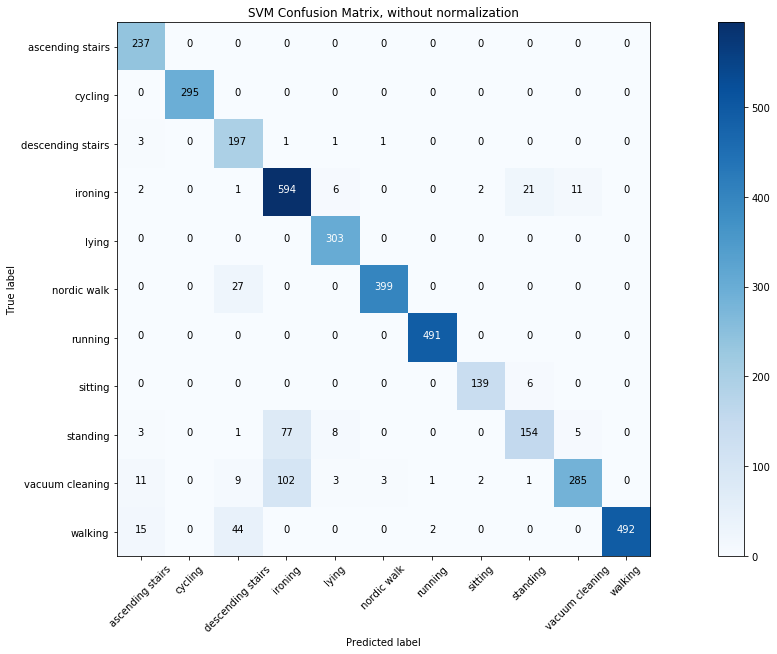



persons that are kept for testing:	6

Accuracy: 0.83989, Precision: 0.86485, Recall: 0.85550, f1_score: 0.83058
Confusion matrix, without normalization


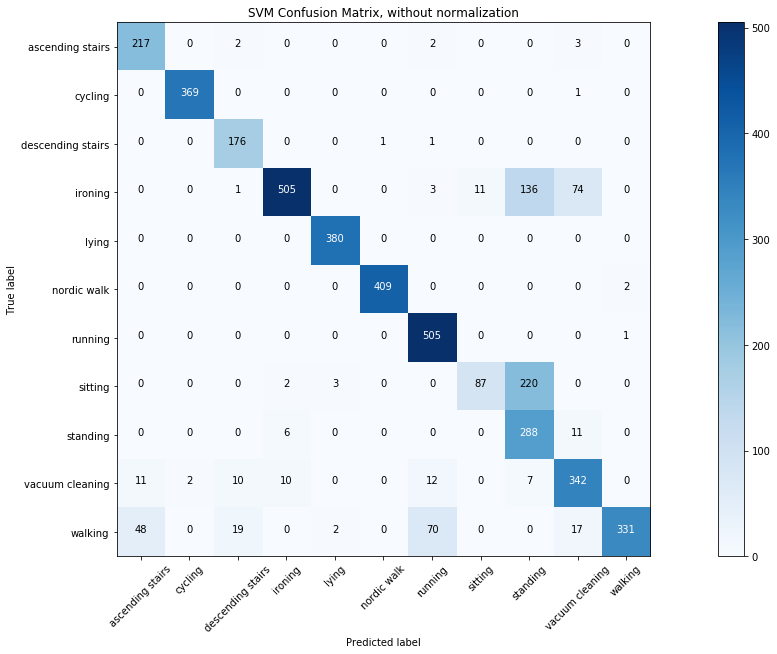



persons that are kept for testing:	7

Accuracy: 0.92373, Precision: 0.96033, Recall: 0.87553, f1_score: 0.86961
Confusion matrix, without normalization


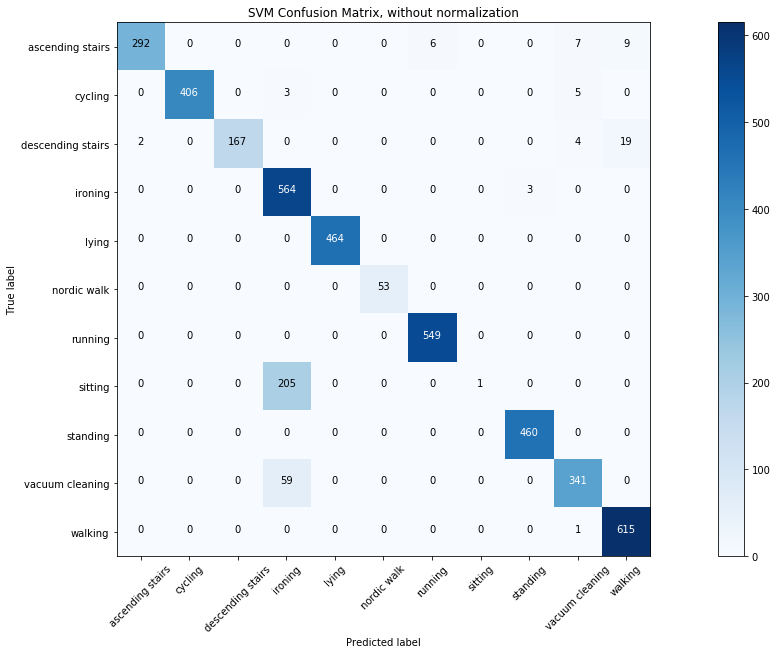



persons that are kept for testing:	8

Accuracy: 0.77430, Precision: 0.84610, Recall: 0.78071, f1_score: 0.77692
Confusion matrix, without normalization


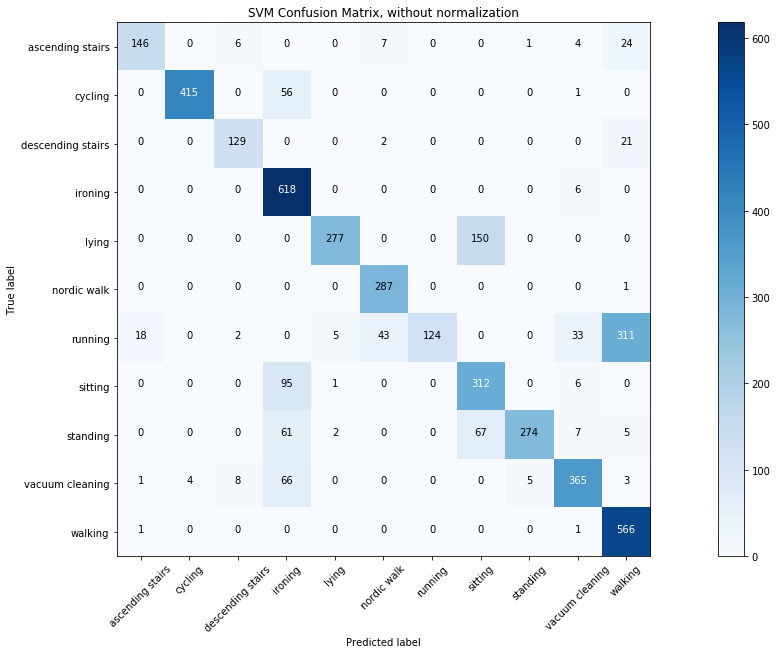



Average accuracy:	0.8706746224162492

Average precision score:	0.8824139617671485

Average recall score:	0.857199704158911

Average F1 score:	0.8465798052381313



In [6]:
a=df['subject'].unique()
l=len(a)
acc=[]
prec=[]
rec=[]
f=[]
for i in range(l):
    print('persons that are kept for testing:\t{}\n'.format(a[i]))
    acc3,prec3,rec3,f3=get_acc_recall_prec_f1_score_and_confusion_mat(a[i])
    acc.append(acc3)
    prec.append(prec3)
    rec.append(rec3)
    f.append(f3)
    print("\n")
    
    
print('Average accuracy:\t{}\n'.format(mean(acc)))
print('Average precision score:\t{}\n'.format(mean(prec)))
print('Average recall score:\t{}\n'.format(mean(rec)))
print('Average F1 score:\t{}\n'.format(mean(f)))   


